sai code

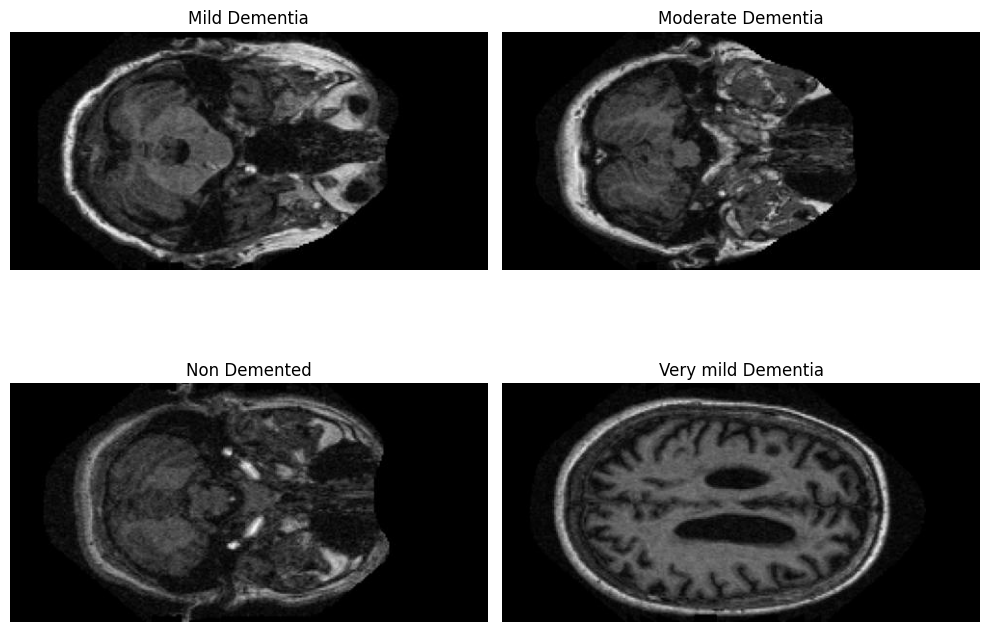

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace with your dataset path
dataset_path = "Data"

# Classes
categories = os.listdir(dataset_path)

# Plot images
plt.figure(figsize=(10, 8))
i = 1
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    first_image = os.listdir(folder_path)[0]  # Get first image
    image_path = os.path.join(folder_path, first_image)
    
    img = mpimg.imread(image_path)
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')
    i += 1

plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd

class_counts = {}
for category in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, category)
    class_counts[category] = len(os.listdir(folder_path))

df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
print(df_counts)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x="Class", y="Image Count", data=df_counts)
plt.title("Number of Images per Class")
plt.xticks(rotation=15)
plt.show()


In [ ]:
from PIL import Image

image_shapes = []

for category in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, category)
    for image_file in os.listdir(folder_path)[:50]:  # check first 50 images per class
        img_path = os.path.join(folder_path, image_file)
        with Image.open(img_path) as img:
            image_shapes.append(img.size)  # (width, height)

# Convert to DataFrame
sizes_df = pd.DataFrame(image_shapes, columns=['Width', 'Height'])
print(sizes_df.describe())
plt.figure(figsize=(8, 5))
sns.histplot(sizes_df['Width'], color='blue', label='Width', kde=True)
sns.histplot(sizes_df['Height'], color='orange', label='Height', kde=True)
plt.title("Distribution of Image Dimensions")
plt.legend()
plt.show()



In [ ]:
import random
plt.figure(figsize=(10, 8))

for idx, category in enumerate(os.listdir(dataset_path)):
    folder = os.path.join(dataset_path, category)
    random_img = random.choice(os.listdir(folder))
    img = mpimg.imread(os.path.join(folder, random_img))
    
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import os

# Set your dataset path
dataset_path = "Data"  # change this to your actual folder

# Get class names directly from the folder structure
class_names = sorted(os.listdir(dataset_path))
print("Classes found:", class_names)


Classes found: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


In [ ]:
aspect_ratios = []

for category in os.listdir(dataset_path):
    folder = os.path.join(dataset_path, category)
    for img_file in os.listdir(folder)[:100]:  # check first 100 images
        img_path = os.path.join(folder, img_file)
        img = Image.open(img_path)
        w, h = img.size
        aspect_ratios.append(w / h)

plt.figure(figsize=(8, 4))
sns.histplot(aspect_ratios, bins=30, kde=True)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.show()


In [ ]:
import numpy as np
def average_brightness(img_path):
    img = Image.open(img_path).convert('L')  # convert to grayscale
    return np.array(img).mean()

brightness_stats = []

for category in class_names:
    folder = os.path.join(dataset_path, category)
    for img_file in os.listdir(folder)[:50]:  # sample size
        path = os.path.join(folder, img_file)
        brightness = average_brightness(path)
        brightness_stats.append((category, brightness))

# Convert to DataFrame
brightness_df = pd.DataFrame(brightness_stats, columns=["Class", "Brightness"])

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=brightness_df, x='Class', y='Brightness')
plt.title("Average Brightness per Class")
plt.xticks(rotation=15)
plt.show()


In [ ]:
import random
plt.figure(figsize=(12, 10))

for idx, category in enumerate(class_names):
    folder_path = os.path.join(dataset_path, category)
    for i in range(3):  # show 3 samples per class
        img_file = random.choice(os.listdir(folder_path))
        img = mpimg.imread(os.path.join(folder_path, img_file))
        plt.subplot(len(class_names), 3, idx*3 + i + 1)
        plt.imshow(img)
        plt.title(f"{category}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def plot_rgb_histogram(img_path):
    img = Image.open(img_path)
    r, g, b = img.split()

    plt.figure(figsize=(6, 4))
    plt.hist(r.histogram(), bins=256, color='red', alpha=0.5, label='Red')
    plt.hist(g.histogram(), bins=256, color='green', alpha=0.5, label='Green')
    plt.hist(b.histogram(), bins=256, color='blue', alpha=0.5, label='Blue')
    plt.legend()
    plt.title("RGB Histogram")
    plt.show()

# Try for a sample image
plot_rgb_histogram(os.path.join(dataset_path, "Mild Dementia", os.listdir(os.path.join(dataset_path, "Mild Dementia"))[0]))


In [ ]:
import numpy as np

def check_grayscale(img_path):
    img = Image.open(img_path).convert('RGB')
    np_img = np.array(img)
    if np.all(np_img[:, :, 0] == np_img[:, :, 1]) and np.all(np_img[:, :, 1] == np_img[:, :, 2]):
        return True
    return False

# Test on one image
print(check_grayscale(os.path.join(dataset_path, "Non Demented", os.listdir(os.path.join(dataset_path, "Non Demented"))[0])))


In [4]:
data = dataset_path

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set your dataset path
dataset_path = "Data"  # replace this!

# Set parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create the image data generator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    color_mode='grayscale',        # use 'rgb' if you skipped grayscale
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Extract class labels from generator
labels = train_data.classes

# Get class names (e.g., ['MildDementia', 'ModerateDementia', ...])
class_names = list(train_data.class_indices.keys())

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Convert to dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Print nicely
print("📊 Class Weights:")
for i, w in class_weights_dict.items():
    print(f"{class_names[i]}: {w:.2f}")


✅ Your Class Weights Summary:
Class	Weight
Mild Dementia	1.36
Moderate Dementia	13.94
Non Demented	0.58
Very mild Dementia	0.68
This means:

🟢 Moderate Dementia is severely underrepresented → model will pay 13x more attention to it.

🟡 Non Demented is very common → model won’t overweight it.

In [ ]:
import matplotlib.pyplot as plt

# Get one batch of images and labels
images, labels = next(train_data)

# Show the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # .squeeze() removes single channel
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras import layers, models

# Define the input shape
input_shape = (224, 224, 1)  # grayscale

# Build model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Conv2D

# Define grayscale-compatible input (1 channel repeated to 3)
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(3, (3, 3), padding='same')(input_layer)  # convert grayscale to RGB

# Load MobileNetV2 without top layers
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # freeze layers

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output_layer = Dense(4, activation='softmax')(x)

mobilenet_model = Model(inputs=input_layer, outputs=output_layer)

mobilenet_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

mobilenet_model.summary()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_data)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    class_idx = np.argmax(labels[i])
    plt.title(f"Class: {class_names[class_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode='grayscale',   # IMPORTANT!
    batch_size=32,
    class_mode='categorical',  # Gives X, y (not X, y, z)
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


In [ ]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])


In [ ]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
x_batch, y_batch = next(train_data)

print("x_batch shape:", x_batch.shape)
print("y_batch shape:", y_batch.shape)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    color_mode='grayscale',    # IMPORTANT for grayscale CNN
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='validation'
)
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
print(type(train_data))
print(next(train_data)[0].shape, next(train_data)[1].shape)


In [ ]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

cnn_history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='validation',
    shuffle=True
)


Found 21809 images belonging to 4 classes.
Found 5450 images belonging to 4 classes.


In [6]:
x_batch, y_batch = next(train_data)
print(x_batch.shape)  # (32, 224, 224, 1)
print(y_batch.shape)  # (32, 4)


(32, 224, 224, 1)
(32, 4)


In [7]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\Sai babu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get numeric labels from train_data
labels = train_data.classes  # this is a list of integers like [0, 1, 2, 3]

# Get class names for printing (optional)
class_names = list(train_data.class_indices.keys())

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Create dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Print nicely
print("📊 Class Weights:")
for i, w in class_weights_dict.items():
    print(f"{class_names[i]}: {w:.2f}")


📊 Class Weights:
Mild Dementia: 1.36
Moderate Dementia: 13.94
Non Demented: 0.58
Very mild Dementia: 0.68


In [11]:
import numpy as np

# Pull all data from generators
x_train, y_train = next(train_data)
for i in range(1, len(train_data)):
    x, y = train_data[i]
    x_train = np.concatenate((x_train, x), axis=0)
    y_train = np.concatenate((y_train, y), axis=0)

x_val, y_val = next(val_data)
for i in range(1, len(val_data)):
    x, y = val_data[i]
    x_val = np.concatenate((x_val, x), axis=0)
    y_val = np.concatenate((y_val, y), axis=0)

print("✅ Final shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)


✅ Final shapes:
x_train: (21809, 224, 224, 1)
y_train: (21809, 4)
x_val: (5450, 224, 224, 1)
y_val: (5450, 4)


In [13]:
cnn_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=5,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)


Epoch 1/5
682/682 ━━━━━━━━━━━━━━━━━━━━ 217s 319ms/step - accuracy: 0.9090 - loss: 0.1972 - val_accuracy: 0.5706 - val_loss: 1.6773
Epoch 2/5
682/682 ━━━━━━━━━━━━━━━━━━━━ 242s 355ms/step - accuracy: 0.9309 - loss: 0.1539 - val_accuracy: 0.5787 - val_loss: 3.2376
Epoch 3/5
682/682 ━━━━━━━━━━━━━━━━━━━━ 259s 380ms/step - accuracy: 0.9644 - loss: 0.0817 - val_accuracy: 0.5963 - val_loss: 3.7147
Epoch 4/5
682/682 ━━━━━━━━━━━━━━━━━━━━ 262s 385ms/step - accuracy: 0.9784 - loss: 0.0451 - val_accuracy: 0.5870 - val_loss: 3.8948


171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step
📋 Classification Report:
                    precision    recall  f1-score   support

     Mild Dementia       0.45      0.37      0.41      1000
 Moderate Dementia       0.50      1.00      0.66        97
      Non Demented       0.67      0.72      0.70      2352
Very mild Dementia       0.50      0.47      0.48      2001

          accuracy                           0.57      5450
         macro avg       0.53      0.64      0.56      5450
      weighted avg       0.56      0.57      0.56      5450



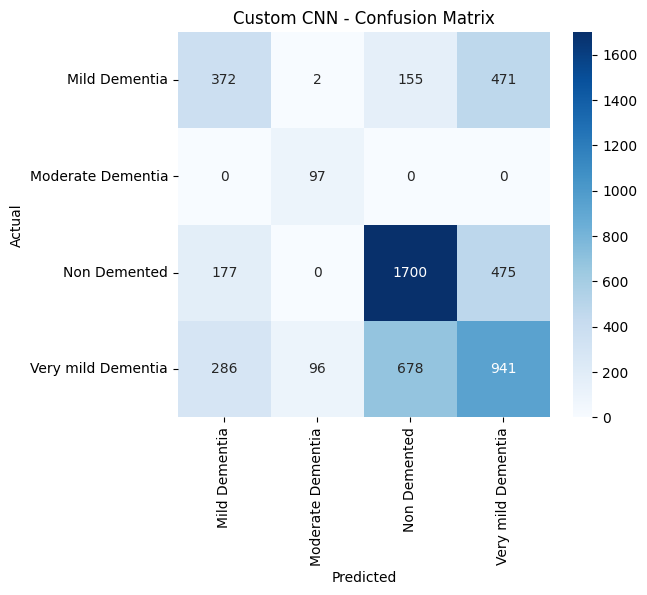

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

y_pred = np.argmax(cnn_model.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis=1)

print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Custom CNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1️⃣ Get class indices and labels from training generator
labels = train_data.classes
class_names = list(train_data.class_indices.keys())
class_indices = train_data.class_indices

# 2️⃣ Compute balanced class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# 3️⃣ Convert to dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# 4️⃣ (Optional) Boost Moderate Dementia even more (highly underrepresented)
moderate_index = class_indices['Moderate Dementia']
class_weights_dict[moderate_index] *= 1.5  # Boost weight by 50%

# 5️⃣ Print for verification
print("📊 Final Class Weights:")
for i, w in class_weights_dict.items():
    print(f"{class_names[i]}: {w:.2f}")


📊 Final Class Weights:
Mild Dementia: 1.36
Moderate Dementia: 20.92
Non Demented: 0.58
Very mild Dementia: 0.68


c:\Users\Sai babu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
682/682 ━━━━━━━━━━━━━━━━━━━━ 460s 672ms/step - accuracy: 0.3267 - loss: 13.5257 - val_accuracy: 0.4316 - val_loss: 14.0476
Epoch 2/15
682/682 ━━━━━━━━━━━━━━━━━━━━ 500s 734ms/step - accuracy: 0.4301 - loss: 13.7872 - val_accuracy: 0.4316 - val_loss: 14.0476
Epoch 3/15
682/682 ━━━━━━━━━━━━━━━━━━━━ 492s 721ms/step - accuracy: 0.4374 - loss: 13.9270 - val_accuracy: 0.4316 - val_loss: 14.0476
Epoch 4/15
682/682 ━━━━━━━━━━━━━━━━━━━━ 490s 719ms/step - accuracy: 0.4278 - loss: 13.8271 - val_accuracy: 0.4316 - val_loss: 14.0476


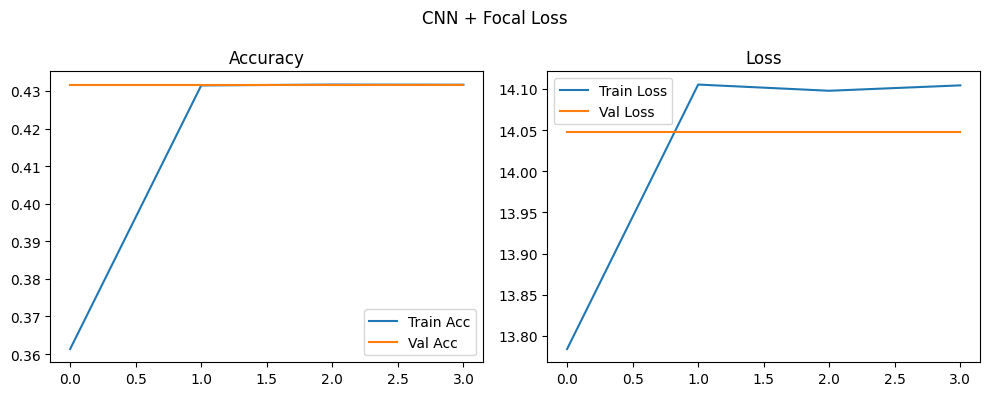

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ✅ Step 1: Define class names and class weights (alpha values for focal loss)
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
alpha_weights = [1.36, 20.92, 0.58, 0.68]  # Order: 0, 1, 2, 3

# ✅ Step 2: Define focal loss manually
def categorical_focal_loss(alpha, gamma=2.0):
    alpha = tf.constant(alpha, dtype=tf.float32)

    def loss_fn(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.math.pow(1 - y_pred, gamma)
        return tf.reduce_mean(tf.reduce_sum(weight * cross_entropy, axis=-1))
    
    return loss_fn

# ✅ Step 3: Build improved CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

# ✅ Step 4: Compile with focal loss
cnn_model.compile(
    optimizer='adam',
    loss=categorical_focal_loss(alpha_weights, gamma=2),
    metrics=['accuracy']
)

# ✅ Step 5: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Step 6: Train
cnn_history = cnn_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=15,
    callbacks=[early_stop]
)

# ✅ Step 7: Plot training history
def plot_training(history, title="CNN + Focal Loss"):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_training(cnn_history)


In [ ]:
cnn_model.save("alzheimer_cnn_model.h5")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define your class names (same order as before)
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# Load and preprocess new image
img_path = "new_scan.jpg"
img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize like training

# Predict
prediction = loaded_model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print(f"🧠 Prediction: {predicted_class}")


🧪 Warm-up training with categorical_crossentropy...
Epoch 1/2
682/682 ━━━━━━━━━━━━━━━━━━━━ 466s 680ms/step - accuracy: 0.4641 - loss: 2.3779 - val_accuracy: 0.4226 - val_loss: 4.4666
Epoch 2/2
682/682 ━━━━━━━━━━━━━━━━━━━━ 511s 750ms/step - accuracy: 0.5751 - loss: 0.9506 - val_accuracy: 0.4580 - val_loss: 2.1303
🔥 Main training with focal loss...
Epoch 1/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 523s 762ms/step - accuracy: 0.5613 - loss: 0.5209 - val_accuracy: 0.5334 - val_loss: 0.4637
Epoch 2/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 511s 749ms/step - accuracy: 0.5318 - loss: 0.4499 - val_accuracy: 0.5044 - val_loss: 0.4414
Epoch 3/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 513s 752ms/step - accuracy: 0.5398 - loss: 0.3890 - val_accuracy: 0.5316 - val_loss: 0.4833
Epoch 4/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 527s 773ms/step - accuracy: 0.5662 - loss: 0.3616 - val_accuracy: 0.5747 - val_loss: 0.4461
Epoch 5/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 600s 880ms/step - accuracy: 0.5835 - loss: 0.3785 - val_accuracy: 0.5415 - val_loss

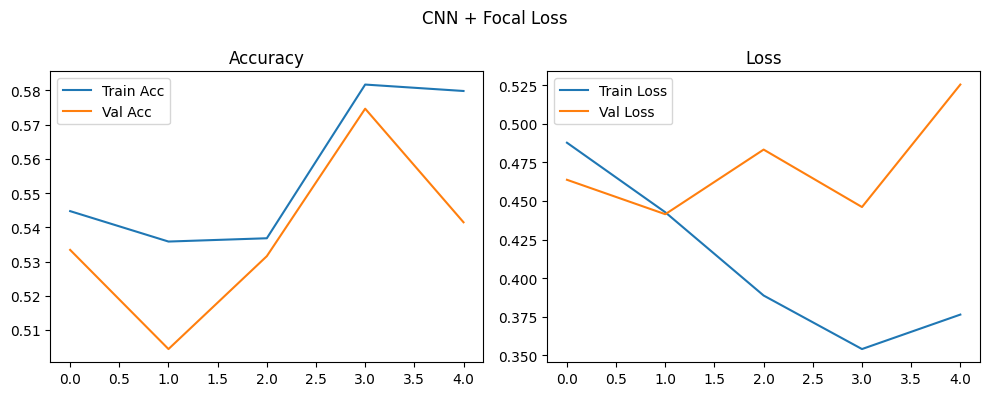

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ✅ Step 1: Class labels + Reduced Alpha for Focal Loss
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
alpha_weights = [1.0, 5.0, 0.5, 0.6]  # 👈 Scaled to prevent stuck gradients

# ✅ Step 2: Manual focal loss function
def categorical_focal_loss(alpha, gamma=2.0):
    alpha = tf.constant(alpha, dtype=tf.float32)

    def loss_fn(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.math.pow(1 - y_pred, gamma)
        return tf.reduce_mean(tf.reduce_sum(weight * cross_entropy, axis=-1))
    
    return loss_fn

# ✅ Step 3: Build the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

# ✅ Step 4: EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Step 5: Warm-up training (2 epochs with categorical crossentropy)
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("🧪 Warm-up training with categorical_crossentropy...")
cnn_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=2,
    callbacks=[early_stop]
)

# ✅ Step 6: Continue training with focal loss
cnn_model.compile(
    optimizer='adam',
    loss=categorical_focal_loss(alpha=alpha_weights, gamma=2),
    metrics=['accuracy']
)

print("🔥 Main training with focal loss...")
cnn_history = cnn_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    callbacks=[early_stop]
)

# ✅ Step 7: Plot training history
def plot_training(history, title="CNN + Focal Loss"):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_training(cnn_history)


In [27]:
cnn_model.save("final_alzheimer_focal_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


C:\Users\Sai babu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


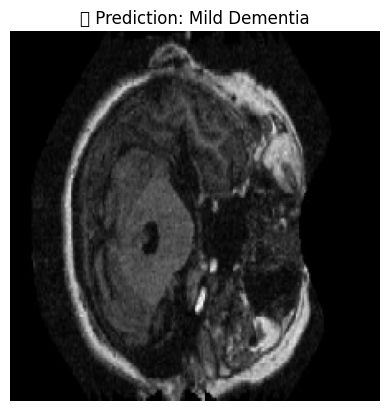


🔍 Class Probabilities:
Mild Dementia: 0.3241
Moderate Dementia: 0.1954
Non Demented: 0.1672
Very mild Dementia: 0.3133


In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# ✅ Step 1: Load the trained model
model = load_model("final_alzheimer_focal_model.h5", compile=False)

# ✅ Step 2: Define class names
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# ✅ Step 3: (Optional) Set working directory if you want short paths
# os.chdir(r"C:\Users\Sai\Desktop")  # Uncomment and set your folder if needed

# ✅ Step 4: Prediction function from local image path
def predict_from_local_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0]
    predicted_class = class_names[np.argmax(prediction)]

    # Display result
    plt.imshow(img, cmap='gray')
    plt.title(f"🧠 Prediction: {predicted_class}")
    plt.axis('off')
    plt.show()

    print("\n🔍 Class Probabilities:")
    for i, prob in enumerate(prediction):
        print(f"{class_names[i]}: {prob:.4f}")

# ✅ Step 5: Call the function with full path or just filename
predict_from_local_image(r"sample\OAS1_0322_MR1_mpr-2_119.jpg")
